### 1. Collecting the data

In [1]:
import pandas as pd
df1 = pd.read_csv('Titanic_train.csv')
df2 = pd.read_csv('Titanic_test.csv')

In [2]:
print(df1.head())
print(df2.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [3]:
print(df1.shape)
print(df2.shape)

(891, 12)
(418, 11)


In [4]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(1309, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
df.drop(df[['Cabin', 'Name', 'Ticket']], axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 92.2+ KB


In [9]:
df.dropna(subset=['Embarked'], axis=0, inplace=True)

In [10]:
df.dropna(subset=['Fare'], axis = 0, inplace = True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived       417
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [12]:
df[['Age']].fillna(value = df['Age'].median(), inplace = True)

C:\Users\cs833\AppData\Local\Temp\ipykernel_24160\238239067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age']].fillna(value = df['Age'].median(), inplace = True)


In [13]:
df.isnull().sum()

PassengerId      0
Survived       417
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [14]:
df['Pclass'].value_counts()

Pclass
3    708
1    321
2    277
Name: count, dtype: int64

In [15]:
df['Parch'].value_counts()

Parch
0    999
1    170
2    113
3      8
5      6
4      6
6      2
9      2
Name: count, dtype: int64

In [16]:
df['SibSp'].value_counts()

SibSp
0    888
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [17]:
import numpy as np

def replace_outliers_with_median(df):
  """
  Replaces outliers in each column of a DataFrame with the median of that column,
  excluding the outliers themselves.

  Args:
    df: A pandas DataFrame.

  Returns:
    A new pandas DataFrame with outliers replaced by median values.
  """
  new_df = df.copy()

  # Iterate over numeric columns
  for col in new_df.select_dtypes(include=[np.number]):
    # Define IQR outlier threshold function (adjust multiplier as needed)
    def is_outlier(series):
      q1 = series.quantile(0.25)
      q3 = series.quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - (1.5 * iqr)
      upper_bound = q3 + (1.5 * iqr)
      return ~((series >= lower_bound) & (series <= upper_bound))

    # Find outliers (boolean Series)
    outliers = is_outlier(new_df[col])
    
    # Replace outliers with median (excluding outliers in median calculation)
    median_val = new_df.loc[~outliers, col].median()
    new_df.loc[outliers, col] = median_val

  return new_df

X = replace_outliers_with_median(df)
print(X)

      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0             1.0       0.0       3    male  22.0      1      0   7.2500   
1             2.0       1.0       1  female  38.0      1      0  13.0000   
2             3.0       1.0       3  female  26.0      0      0   7.9250   
3             4.0       1.0       1  female  35.0      1      0  53.1000   
4             5.0       0.0       3    male  35.0      0      0   8.0500   
...           ...       ...     ...     ...   ...    ...    ...      ...   
1304       1305.0       0.0       3    male  28.0      0      0   8.0500   
1305       1306.0       0.0       1  female  39.0      0      0  13.0000   
1306       1307.0       0.0       3    male  38.5      0      0   7.2500   
1307       1308.0       0.0       3    male  28.0      0      0   8.0500   
1308       1309.0       0.0       3    male  28.0      1      0  22.3583   

     Embarked  
0           S  
1           C  
2           S  
3           S  
4      

C:\Users\cs833\AppData\Local\Temp\ipykernel_24160\3777600631.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '654.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_df.loc[outliers, col] = median_val


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1306 non-null   int64  
 3   Sex          1306 non-null   object 
 4   Age          1043 non-null   float64
 5   SibSp        1306 non-null   int64  
 6   Parch        1306 non-null   int64  
 7   Fare         1306 non-null   float64
 8   Embarked     1306 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 102.0+ KB


In [19]:
df_cat = df[['Sex', 'Pclass', 'Embarked']]
df_num = pd.concat([X['Age'], df[['Fare', 'SibSp', 'Parch']]], axis = 1)

In [20]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1306 non-null   float64
 1   Fare    1306 non-null   float64
 2   SibSp   1306 non-null   int64  
 3   Parch   1306 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 51.0 KB


### 3. Data Transformation

In [21]:
# Scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_num = ss.fit_transform(df_num)
df_num = pd.DataFrame(df_num)
df_num.columns = ['Age', 'Fare', 'SibSp', 'Parch']
df_num.head()

,Age,Fare,SibSp,Parch
0,-0.578573,-0.501949,0.479763,-0.445612
1,0.717277,0.735501,0.479763,-0.445612
2,-0.254610,-0.488905,-0.479763,-0.445612
3,0.474306,0.384107,0.479763,-0.445612
4,0.474306,-0.486489,-0.479763,-0.445612


In [22]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df_cat.columns:
    df_cat[i] = le.fit_transform(df_cat[i])

df_cat.head()

C:\Users\cs833\AppData\Local\Temp\ipykernel_24160\3223594336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i] = le.fit_transform(df_cat[i])
C:\Users\cs833\AppData\Local\Temp\ipykernel_24160\3223594336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[i] = le.fit_transform(df_cat[i])
C:\Users\cs833\AppData\Local\Temp\ipykernel_24160\3223594336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Sex,Pclass,Embarked
0,1,2,2
1,0,0,0
2,0,2,2
3,0,0,2
4,1,2,2


In [23]:
df['Survived'].value_counts()

Survived
0.0    549
1.0    340
Name: count, dtype: int64

In [24]:
data = pd.concat([df_num, df_cat, df['Survived']], axis = 1)
data.head()

,Age,Fare,SibSp,Parch,Sex,Pclass,Embarked,Survived
0,-0.578573,-0.501949,0.479763,-0.445612,1.0,2.0,2.0,0.0
1,0.717277,0.735501,0.479763,-0.445612,0.0,0.0,0.0,1.0
2,-0.254610,-0.488905,-0.479763,-0.445612,0.0,2.0,2.0,1.0
3,0.474306,0.384107,0.479763,-0.445612,0.0,0.0,2.0,1.0
4,0.474306,-0.486489,-0.479763,-0.445612,1.0,2.0,2.0,0.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1306 non-null   float64
 1   Fare      1306 non-null   float64
 2   SibSp     1306 non-null   float64
 3   Parch     1306 non-null   float64
 4   Sex       1306 non-null   float64
 5   Pclass    1306 non-null   float64
 6   Embarked  1306 non-null   float64
 7   Survived  889 non-null    float64
dtypes: float64(8)
memory usage: 81.9 KB


### 4. Data Partition

In [26]:
# Splitting the train data based on the Survived column where row is not null
train_data = data[data['Survived'].notnull()]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Fare      889 non-null    float64
 2   SibSp     889 non-null    float64
 3   Parch     889 non-null    float64
 4   Sex       889 non-null    float64
 5   Pclass    889 non-null    float64
 6   Embarked  889 non-null    float64
 7   Survived  889 non-null    float64
dtypes: float64(8)
memory usage: 62.5 KB


In [27]:
def convert_to_int(value):
  if value == 0.0:
    return 0
  elif value == 1.0:
    return 1
  else:
    # Handle non-binary values (raise an error, assign a specific value, etc.)
    raise ValueError(f"Unexpected value in 'Survived': {value}")

train_data['Survived'] = train_data['Survived'].apply(convert_to_int)

C:\Users\cs833\AppData\Local\Temp\ipykernel_24160\144161172.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Survived'] = train_data['Survived'].apply(convert_to_int)


In [28]:
train_data.tail()

,Age,Fare,SibSp,Parch,Sex,Pclass,Embarked,Survived
886,-0.092629,-0.188883,0.479763,1.863789,1.0,1.0,2.0,0
887,-0.254610,-0.062303,-0.479763,-0.445612,0.0,0.0,2.0,1
888,0.231334,-0.492287,-0.479763,-0.445612,0.0,2.0,2.0,0
889,0.433810,-0.490756,-0.479763,-0.445612,1.0,0.0,0.0,1
890,1.446193,-0.506781,0.479763,-0.445612,1.0,2.0,1.0,0


In [29]:
# Splitting the test data where Survived column is having null value
# In the test there should be no target variable
test_data = data[data['Survived'].isnull()]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 61 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       417 non-null    float64
 1   Fare      417 non-null    float64
 2   SibSp     417 non-null    float64
 3   Parch     417 non-null    float64
 4   Sex       417 non-null    float64
 5   Pclass    417 non-null    float64
 6   Embarked  417 non-null    float64
 7   Survived  0 non-null      float64
dtypes: float64(8)
memory usage: 29.5 KB


In [30]:
test_data.drop(test_data[['Survived']], axis=1, inplace = True)

C:\Users\cs833\AppData\Local\Temp\ipykernel_24160\130624227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(test_data[['Survived']], axis=1, inplace = True)


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 61 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       417 non-null    float64
 1   Fare      417 non-null    float64
 2   SibSp     417 non-null    float64
 3   Parch     417 non-null    float64
 4   Sex       417 non-null    float64
 5   Pclass    417 non-null    float64
 6   Embarked  417 non-null    float64
dtypes: float64(7)
memory usage: 26.2 KB


### 5. Model fitting

In [32]:
X_train = train_data.iloc[:, :-1]
Y_train = train_data[['Survived']]

print(X_train.isnull().sum())
print(Y_train.isnull().sum())

Age         0
Fare        0
SibSp       0
Parch       0
Sex         0
Pclass      0
Embarked    0
dtype: int64
Survived    0
dtype: int64


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
Y_pred_train = model.predict(X_train)

# Metrics

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train, Y_pred_train)
print('Training accuracy:', round(ac1, 3))

Training accuracy: 0.782


In [35]:
# Cross Validation

training_acc = []
test_acc = []

for i in range(1, 200):
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    training_acc.append(accuracy_score(Y_train, Y_pred_train))

import numpy as np
print('Cross Validation - Training accuracy', np.mean(training_acc).round(3))


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was 

Cross Validation - Training accuracy 0.782


d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was 

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, Y_pred_train)
cm

array([[456,  93],
       [101, 239]], dtype=int64)

In [37]:
# Recall / Sensitivity, Precision, F1 score
from sklearn.metrics import recall_score, precision_score, f1_score
print('Accuracy Score:', round(ac1, 3))
print('Sensitivity Score:', recall_score(Y_train, Y_pred_train).round(3))
print('Precision Score:', precision_score(Y_train, Y_pred_train).round(3))
print('F1 Score:', f1_score(Y_train, Y_pred_train).round(3))

TN = cm[0, 0]
FP = cm[0, 1]
TNR = TN / (TN + FP)
print('Specificity:', TNR.round(3))

Accuracy Score: 0.782
Sensitivity Score: 0.703
Precision Score: 0.72
F1 Score: 0.711
Specificity: 0.831


The accuracy score of the training is 78.2%.

In [38]:
train_data['Proba'] = model.predict_proba(X_train)[:, 1]
train_data.head()

C:\Users\cs833\AppData\Local\Temp\ipykernel_24160\669571288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Proba'] = model.predict_proba(X_train)[:, 1]


,Age,Fare,SibSp,Parch,Sex,Pclass,Embarked,Survived,Proba
0,-0.578573,-0.501949,0.479763,-0.445612,1.0,2.0,2.0,0,0.083753
1,0.717277,0.735501,0.479763,-0.445612,0.0,0.0,0.0,1,0.917504
2,-0.254610,-0.488905,-0.479763,-0.445612,0.0,2.0,2.0,1,0.586327
3,0.474306,0.384107,0.479763,-0.445612,0.0,0.0,2.0,1,0.868549
4,0.474306,-0.486489,-0.479763,-0.445612,1.0,2.0,2.0,0,0.098379


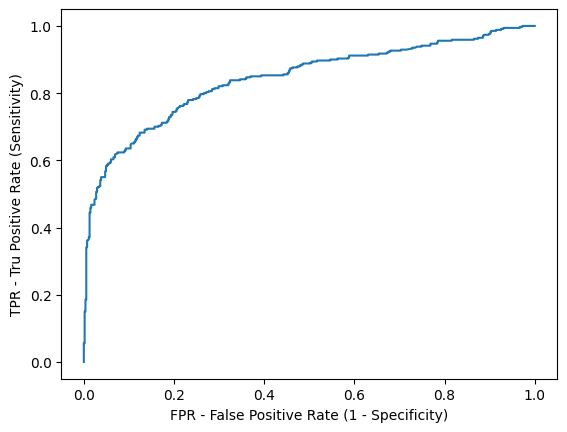

In [39]:
# ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, dum = roc_curve(Y_train, train_data['Proba'])

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('FPR - False Positive Rate (1 - Specificity)')
plt.ylabel('TPR - Tru Positive Rate (Sensitivity)')
plt.show()

In [40]:
auc_score = roc_auc_score(Y_train, train_data['Proba'])
print("Area under curve:", auc_score.round(3))

Area under curve: 0.843


In [41]:
test_data = test_data.dropna()

In [42]:
Y_pred_test = model.predict(test_data)
Y_pred_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

We cannot find the accuracy score of the predicted test data because there is no actual test data.